# THIS IS THE FINAL NOTEBOOK THAT MAKES ALL PLOTS USED IN THE PAPER --> data are stored on Vollmond

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
from statistics import mode
from matplotlib import cm
from iteration_utilities import flatten
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker

In [ ]:
save_plot = True

plot_dir = 'plots/FINAL/'
os.system('mkdir -p {}'.format(plot_dir))

colors = {
    'brems': cm.tab10(0),
    'nuclint': cm.tab10(1), 
    'epair': cm.tab10(2),
    'ioniz': cm.tab10(3) 
}


### Paper style

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "font.family": "serif",
#     "font.serif": "Times",
    'axes.labelsize': 12,
    "legend.fontsize":11,
    "font.sans-serif": ["Helvetica"],
#    "text.latex.preamble": [r'"\usepackage{amsmath}"'],
})


## Deflection per interaction plot

In [3]:
# Read data
# save deflections of each interaction type for final paper notebook, using van Ginneken

brems_defl_vG_ex = list(flatten(pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='brems_defl_vG_ex').values))
nuclint_defl_vG_ex = list(flatten(pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='nuclint_defl_vG_ex').values))
epair_defl_default_ex = list(flatten(pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='epair_defl_default_ex').values))
ioniz_defl_default_ex = list(flatten(pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='ioniz_defl_default_ex').values))

df_moliere = pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='cont_moliere')
df_highland = pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='cont_highland')

median brems:  3.80719731044687e-05 , low 95%: 1.4395657429725528e-06, high 95: 0.0029744293880631266
median nuclint:  0.00011689564792964204 , low 95%: 4.180084824142579e-06, high 95: 0.009631607730537018
median epair:  1.2562030154574238e-06 , low 95%: 1.558575234278001e-07, high 95: 4.238512932908016e-05
median ioniz:  4.430583459678831e-05 , low 95%: 1.4787793334710982e-06, high 95: 0.0018148395157161227
median total:  1.4731194585379392e-06 , low 95%: 1.642061301897989e-07, high 95: 0.000279064109138651
median total cont:  3.894291349042205e-06 , low 95%: 2.1746180562260397e-07, high 95: 0.001288161326506989
median moliere:  1.2292222912206651e-05 , low 95%: 4.883319844405444e-07, high 95: 0.0022222394944974924
median highland:  1.2499374024179615581e-05 , low 95%: 5.065769225773643e-07, high 95: 0.00224984847717195
ratio of zeros (extern):  5.600985773496135e-05


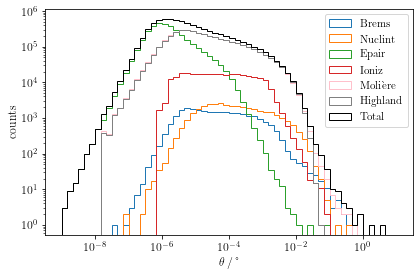

In [4]:
bins = np.logspace(-9, 1, 61)

plt.hist(np.rad2deg(brems_defl_vG_ex), bins=bins, histtype='step', color=colors['brems'], label='Brems')
plt.hist(np.rad2deg(nuclint_defl_vG_ex), bins=bins, histtype='step', color=colors['nuclint'], label='Nuclint')
plt.hist(np.rad2deg(epair_defl_default_ex), bins=bins, histtype='step', color=colors['epair'], label='Epair')
plt.hist(np.rad2deg(ioniz_defl_default_ex), bins=bins, histtype='step', color=colors['ioniz'], label='Ioniz')

plt.hist(np.rad2deg(df_moliere.cont_moliere), bins=bins, histtype='step', color='pink', label='Molière')
plt.hist(np.rad2deg(df_highland.cont_highland), bins=bins, histtype='step', color='gray', label='Highland')



# total with moliere
total_defl_vG_cont = list(flatten([brems_defl_vG_ex, nuclint_defl_vG_ex, epair_defl_default_ex, ioniz_defl_default_ex, df_moliere.cont_moliere]))
plt.hist(np.rad2deg(total_defl_vG_cont), bins=bins, histtype='step', color='black', label='Total')

total_defl_vG = list(flatten([brems_defl_vG_ex, nuclint_defl_vG_ex, epair_defl_default_ex, ioniz_defl_default_ex])) 

print('median brems: ', np.median(np.rad2deg(brems_defl_vG_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(brems_defl_vG_ex), 0.025), np.quantile(np.rad2deg(brems_defl_vG_ex), 0.975)))
print('median nuclint: ', np.median(np.rad2deg(nuclint_defl_vG_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(nuclint_defl_vG_ex), 0.025), np.quantile(np.rad2deg(nuclint_defl_vG_ex), 0.975)))
print('median epair: ', np.median(np.rad2deg(epair_defl_default_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(epair_defl_default_ex), 0.025), np.quantile(np.rad2deg(epair_defl_default_ex), 0.975)))
print('median ioniz: ', np.median(np.rad2deg(ioniz_defl_default_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(ioniz_defl_default_ex), 0.025), np.quantile(np.rad2deg(ioniz_defl_default_ex), 0.975)))
print('median total: ', np.median(np.rad2deg(total_defl_vG)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(total_defl_vG), 0.025), np.quantile(np.rad2deg(total_defl_vG), 0.975)))
print('median total cont: ', np.median(np.rad2deg(total_defl_vG_cont)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(total_defl_vG_cont), 0.025), np.quantile(np.rad2deg(total_defl_vG_cont), 0.975)))
print('median moliere: ', np.median(np.rad2deg(df_moliere.cont_moliere)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(df_moliere.cont_moliere), 0.025), np.quantile(np.rad2deg(df_moliere.cont_moliere), 0.975)))
print('median highland: ', np.median(np.rad2deg(df_highland.cont_highland)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(df_highland.cont_highland), 0.025), np.quantile(np.rad2deg(df_highland.cont_highland), 0.975)))

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$°')
plt.ylabel('counts')
plt.legend(loc='upper right')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_1TeV_1000events_deflection_along_sampling.pdf')

# ratio of zeros
print('ratio of zeros (extern): ', np.sum(np.array(total_defl_vG)==0)/len(total_defl_vG))

median brems:  3.80719731044687e-05 , low 95%: 1.4395657429725528e-06, high 95: 0.0029744293880631266
median nuclint:  0.00011689564792964204 , low 95%: 4.180084824142579e-06, high 95: 0.009631607730537018
median epair:  1.2562030154574238e-06 , low 95%: 1.558575234278001e-07, high 95: 4.238512932908016e-05
median ioniz:  4.430583459678831e-05 , low 95%: 1.4787793334710982e-06, high 95: 0.0018148395157161227
median total:  1.4731194585379392e-06 , low 95%: 1.642061301897989e-07, high 95: 0.000279064109138651
median total cont:  3.894291349042205e-06 , low 95%: 2.1746180562260397e-07, high 95: 0.001288161326506989
median moliere:  1.2292222912206651e-05 , low 95%: 4.883319844405444e-07, high 95: 0.0022222394944974924
median highland:  1.2499374024179615581e-05 , low 95%: 5.065769225773643e-07, high 95: 0.00224984847717195
ratio of zeros (extern):  5.600985773496135e-05


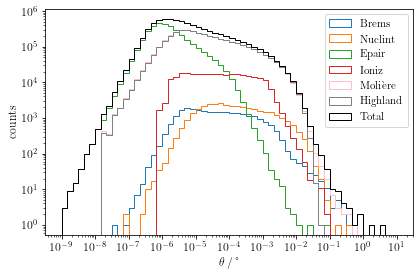

In [5]:
bins = np.logspace(-9, 1, 61)

fig, ax = plt.subplots()

ax.hist(np.rad2deg(brems_defl_vG_ex), bins=bins, histtype='step', color=colors['brems'], label='Brems')
ax.hist(np.rad2deg(nuclint_defl_vG_ex), bins=bins, histtype='step', color=colors['nuclint'], label='Nuclint')
ax.hist(np.rad2deg(epair_defl_default_ex), bins=bins, histtype='step', color=colors['epair'], label='Epair')
ax.hist(np.rad2deg(ioniz_defl_default_ex), bins=bins, histtype='step', color=colors['ioniz'], label='Ioniz')

ax.hist(np.rad2deg(df_moliere.cont_moliere), bins=bins, histtype='step', color='pink', label='Molière')
ax.hist(np.rad2deg(df_highland.cont_highland), bins=bins, histtype='step', color='gray', label='Highland')



# total with moliere
total_defl_vG_cont = list(flatten([brems_defl_vG_ex, nuclint_defl_vG_ex, epair_defl_default_ex, ioniz_defl_default_ex, df_moliere.cont_moliere]))
ax.hist(np.rad2deg(total_defl_vG_cont), bins=bins, histtype='step', color='black', label='Total')

total_defl_vG = list(flatten([brems_defl_vG_ex, nuclint_defl_vG_ex, epair_defl_default_ex, ioniz_defl_default_ex])) 

print('median brems: ', np.median(np.rad2deg(brems_defl_vG_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(brems_defl_vG_ex), 0.025), np.quantile(np.rad2deg(brems_defl_vG_ex), 0.975)))
print('median nuclint: ', np.median(np.rad2deg(nuclint_defl_vG_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(nuclint_defl_vG_ex), 0.025), np.quantile(np.rad2deg(nuclint_defl_vG_ex), 0.975)))
print('median epair: ', np.median(np.rad2deg(epair_defl_default_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(epair_defl_default_ex), 0.025), np.quantile(np.rad2deg(epair_defl_default_ex), 0.975)))
print('median ioniz: ', np.median(np.rad2deg(ioniz_defl_default_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(ioniz_defl_default_ex), 0.025), np.quantile(np.rad2deg(ioniz_defl_default_ex), 0.975)))
print('median total: ', np.median(np.rad2deg(total_defl_vG)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(total_defl_vG), 0.025), np.quantile(np.rad2deg(total_defl_vG), 0.975)))
print('median total cont: ', np.median(np.rad2deg(total_defl_vG_cont)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(total_defl_vG_cont), 0.025), np.quantile(np.rad2deg(total_defl_vG_cont), 0.975)))
print('median moliere: ', np.median(np.rad2deg(df_moliere.cont_moliere)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(df_moliere.cont_moliere), 0.025), np.quantile(np.rad2deg(df_moliere.cont_moliere), 0.975)))
print('median highland: ', np.median(np.rad2deg(df_highland.cont_highland)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(df_highland.cont_highland), 0.025), np.quantile(np.rad2deg(df_highland.cont_highland), 0.975)))


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\theta\,/\,$°')
ax.set_ylabel('counts')
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.legend(loc='upper right')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_1TeV_1000events_deflection_along_sampling_minorticks.pdf')

# ratio of zeros
print('ratio of zeros (extern): ', np.sum(np.array(total_defl_vG)==0)/len(total_defl_vG))

## Attwood data comparison 

### old

In [ ]:
# Read PROPOSAL data
data_dir = 'data/attwood/'
key_0 = 'E199_moliere_v_cut0.001'
df_0 = pd.read_hdf(data_dir + 'sim_data.hdf5', key=key_0)
key_5 = 'E199_moliere_v_cut1e-05'
df_5 = pd.read_hdf(data_dir + 'sim_data.hdf5', key=key_5)
key_7 = 'E199_only_moliere_v_cut1e-05'
df_7 = pd.read_hdf(data_dir + 'sim_data.hdf5', key=key_7)

# read in unfoled data of Attwood, angle in rad and probability in percent
Attwood = pd.read_csv('data/attwood/Attwood_unfolded_data.csv', sep=';', decimal=',', names=['angle', 'probability']) 
print('total probability attwood: ', np.sum(Attwood.probability))
GEANT4 = pd.read_csv('data/attwood/Attwood_GEANT4.csv', sep=';', decimal=',', names=['angle', 'probability']) 

In [ ]:
# Set binning
binning = [Attwood.angle[i] - abs(Attwood.angle[i+1] - Attwood.angle[i])/2 for i in range(len(Attwood)-1)]
binning.append(Attwood.angle.values[-1] - abs(Attwood.angle.values[-1] - Attwood.angle.values[-2])/2)
binning.append(Attwood.angle.values[-1] + abs(Attwood.angle.values[-1] - Attwood.angle.values[-2])/2)

# plot y direction
plt.plot(Attwood.angle, Attwood.probability, 'o', color='black', alpha=0.7, label='Attwood')
plt.plot(GEANT4.angle, GEANT4.probability, '^', color='black', alpha=0.7, label='Geant4')

bins = binning
plt.hist(df_0.tracks_109_y, bins=bins, histtype='step', density=True, label=r'\raggedleft PROPOSAL \newline $v_{\mathrm{cut}} = 10^{-3}$')
plt.hist(df_5.tracks_109_y, bins=bins, histtype='step', density=True, label=r'\raggedleft PROPOSAL \newline $v_{\mathrm{cut}} = 10^{-5}$')
plt.hist(df_7.tracks_109_y, bins=bins, histtype='step', density=True, label=r'\raggedleft PROPOSAL \newline $v_{\mathrm{cut}} = 10^{-5}$ Mol.')

plt.ylabel('normalized counts')
# plt.xlabel('y angle in rad')
plt.xlabel(r'$\theta_{\mathrm{y}}\,/\,$rad')
plt.yscale('log')
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
if save_plot:    
    plt.savefig(plot_dir + 'attwood_comparison_moliere_E199MeV_final.pdf', bbox_inches='tight')
print('moliere, E = 199 MeV')

### new

In [ ]:
Attwood_data = pd.read_csv('data/attwood/attwood_true_data.txt',sep='\s+', names=['upper_bin_edge', 'data', 'data_unc', 'G4', 'G4_unc'], engine='python', skiprows=1, skipfooter=1)

full_data = {}
for key in Attwood_data:
    if 'bin' in key:
        full_data[key] = [-b for b in Attwood_data[key][::-1]]
    else:
        full_data[key] = [b for b in Attwood_data[key][::-1]]
    for b in Attwood_data[key]:
        full_data[key].append(b)
        
ATTWOOD = pd.DataFrame()
ATTWOOD['upper_bin_edge'] = full_data['upper_bin_edge']
ATTWOOD['data'] = full_data['data']
ATTWOOD['data_unc'] = full_data['data_unc']
ATTWOOD['G4'] = full_data['G4']
ATTWOOD['G4_unc'] = full_data['G4_unc']

hist_binning = ATTWOOD.upper_bin_edge

bin_mids = []
# bin_mids = [ATTWOOD.upper_bin_edge[0] - abs(ATTWOOD.upper_bin_edge[1] - ATTWOOD.upper_bin_edge[0])/2]
bin_mids_h = [ATTWOOD.upper_bin_edge[i] + abs(ATTWOOD.upper_bin_edge[i+1] - ATTWOOD.upper_bin_edge[i])/2 for i in range(len(ATTWOOD)-1)] 
for b in bin_mids_h:
    bin_mids.append(b)
# bin_mids.append(ATTWOOD.upper_bin_edge.values[-1] + abs(ATTWOOD.upper_bin_edge.values[-1] - ATTWOOD.upper_bin_edge.values[-2])/2 )

ATTWOOD = ATTWOOD.drop(10, axis=0)
ATTWOOD['bin_mids'] = bin_mids

In [ ]:
df_01 = pd.read_hdf('data/attwood_199MeV_hydrogen/attwood_run_01.hdf5') # v_cut = 1e-5
df_02 = pd.read_hdf('data/attwood_199MeV_hydrogen/attwood_run_02.hdf5') # v_cut = 1e-5 only Moliere
df_03 = pd.read_hdf('data/attwood_199MeV_hydrogen/attwood_run_03.hdf5') # v_cut = 1e-3

# distance should be 10.9 cm
print(np.unique(df_01.distances))
print(np.unique(df_02.distances))
print(np.unique(df_03.distances))

df_01 = df_01[df_01.distances == 0.109]
df_02 = df_02[df_02.distances == 0.109]
df_03 = df_03[df_03.distances == 0.109]

In [ ]:
df_dict_01 = {}
for seed in np.unique(df_01.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_01[key] = df_01[df_01.rnd_seed == seed]
    
df_dict_02 = {}
for seed in np.unique(df_02.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_02[key] = df_02[df_02.rnd_seed == seed]
    
df_dict_03 = {}
for seed in np.unique(df_03.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_03[key] = df_03[df_03.rnd_seed == seed]
    
hist_data_n_01 = []
bins = hist_binning
for df in df_dict_01:
    n, x = np.histogram(df_dict_01[df].y_dir_f, bins=bins, density=True)
    hist_data_n_01.append(n)
    hist_data_n_mean_01 = np.mean(hist_data_n_01, axis=0)
hist_data_n_std_01 = np.std(hist_data_n_01, axis=0)
hist_data_n_median_01 = np.median(hist_data_n_01, axis=0)

hist_data_n_02 = []
for df in df_dict_02:
    n, x = np.histogram(df_dict_02[df].y_dir_f, bins=bins, density=True)
    hist_data_n_02.append(n)
    hist_data_n_mean_02 = np.mean(hist_data_n_02, axis=0)
hist_data_n_std_02 = np.std(hist_data_n_02, axis=0)
hist_data_n_median_02 = np.median(hist_data_n_02, axis=0)

hist_data_n_03 = []
for df in df_dict_03:
    n, x = np.histogram(df_dict_03[df].y_dir_f, bins=bins, density=True)
    hist_data_n_03.append(n)
    hist_data_n_mean_03 = np.mean(hist_data_n_03, axis=0)
hist_data_n_std_03 = np.std(hist_data_n_03, axis=0)
hist_data_n_median_03 = np.median(hist_data_n_03, axis=0)

In [ ]:
# attwood data
plt.errorbar(ATTWOOD.bin_mids, ATTWOOD.data, fmt='o', color='black', alpha=0.9, yerr=ATTWOOD.data_unc, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='ATTWOOD')
plt.errorbar(ATTWOOD.bin_mids, ATTWOOD.G4, fmt='.', color='black', alpha=0.9, yerr=ATTWOOD.G4_unc, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='Geant4')

# run 03
plt.errorbar(ATTWOOD.bin_mids, hist_data_n_mean_03, fmt='.', yerr=hist_data_n_std_03, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='v = 1e-3')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_03, fmt='.', 
#              yerr=[hist_data_n_median_03-np.quantile(hist_data_n_03, 0.159, axis=0), np.quantile(hist_data_n_03, 0.841, axis=0)-hist_data_n_median_03],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

# run 01
plt.errorbar(ATTWOOD.bin_mids, hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='v = 1e-5')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_01, fmt='.', 
#              yerr=[hist_data_n_median_01-np.quantile(hist_data_n_01, 0.159, axis=0), np.quantile(hist_data_n_01, 0.841, axis=0)-hist_data_n_median_01],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

# run 02
plt.errorbar(ATTWOOD.bin_mids, hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='v = 1e-5 Mol.')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_02, fmt='.', 
#              yerr=[hist_data_n_median_02-np.quantile(hist_data_n_02, 0.159, axis=0), np.quantile(hist_data_n_02, 0.841, axis=0)-hist_data_n_median_02],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

plt.yscale('log')
plt.xlabel(r'$\theta_{\mathrm{y}}\,/\,$rad')
plt.ylabel('normalized counts')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir + 'attwood_comparison_moliere_199MeV_final_multi_mean.pdf', bbox_inches='tight')

In [ ]:
# attwood data
plt.errorbar(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data, fmt='o', color='black', alpha=0.9, yerr=ATTWOOD.data_unc, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label='Attwood')
plt.errorbar(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.G4, fmt='^', color='black', alpha=0.9, yerr=ATTWOOD.G4_unc, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label='Geant4')

# run 03
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_mean_03, fmt='.', yerr=hist_data_n_std_03, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='v = 1e-3')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_03, fmt='.', 
#              yerr=[hist_data_n_median_03-np.quantile(hist_data_n_03, 0.159, axis=0), np.quantile(hist_data_n_03, 0.841, axis=0)-hist_data_n_median_03],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

# run 01
plt.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label=r'\raggedleft PROPOSAL')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_01, fmt='.', 
#              yerr=[hist_data_n_median_01-np.quantile(hist_data_n_01, 0.159, axis=0), np.quantile(hist_data_n_01, 0.841, axis=0)-hist_data_n_median_01],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

# run 02
plt.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label=r'\raggedleft PROPOSAL \newline Molière only')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_02, fmt='.', 
#              yerr=[hist_data_n_median_02-np.quantile(hist_data_n_02, 0.159, axis=0), np.quantile(hist_data_n_02, 0.841, axis=0)-hist_data_n_median_02],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

plt.yscale('log')
plt.xlabel(r'$\theta_{\mathrm{y}}\,/\,$°')
plt.ylabel('counts')
plt.minorticks_on()
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(plot_dir + 'attwood_comparison_moliere_199MeV_final_multi_mean_deg.pdf', bbox_inches='tight')

# Akimenko data comparison

### old

In [ ]:
key_0 = 'E7301_moliere_v_cut0.001'
df_0 = pd.read_hdf('data/akimenko/sim_data.hdf5', key=key_0)

key_5 = 'E7301_moliere_v_cut1e-05'
df_5 = pd.read_hdf('data/akimenko/sim_data.hdf5', key=key_5)

key_7 = 'E7301_only_moliere_v_cut1e-05'
df_7 = pd.read_hdf('data/akimenko/sim_data.hdf5', key=key_7)

# read in unfoled data of Attwood, angle in rad and probability in percent
Akimenko = pd.read_csv('data/akimenko/Akimenko_data.csv', sep=';', decimal=',', names=['angle', 'probability']) 
print('total counts akimenko: ', np.sum(Akimenko.probability))

In [ ]:
# plot y direction
binning = [Akimenko.angle[0] - abs(Akimenko.angle[1] - Akimenko.angle[0])/2]
binning_h = [Akimenko.angle[i] + abs(Akimenko.angle[i+1] - Akimenko.angle[i])/2 for i in range(len(Akimenko)-1)]
for b in binning_h:
    binning.append(b)
binning.append(Akimenko.angle.values[-1] + abs(Akimenko.angle.values[-1] - Akimenko.angle.values[-2])/2 )

plt.plot(Akimenko.angle*1000, Akimenko.probability, 'o', color='black', alpha=0.7, label='Akimenko')

bins = np.array(binning)
plt.hist(df_0.tracks_144_y*1000, bins=bins*1000, histtype='step', label=r'\raggedleft PROPOSAL \newline \texttt{v\_cut} $= 10^{-3}$')
plt.hist(df_5.tracks_144_y*1000, bins=bins*1000, histtype='step', label=r'\raggedleft PROPOSAL \newline \texttt{v\_cut} $= 10^{-5}$')
plt.hist(df_7.tracks_144_y*1000, bins=bins*1000, histtype='step', label=r'\raggedleft PROPOSAL \newline \texttt{v\_cut} $= 10^{-5}$ Mol.') # only Molière 


plt.ylabel('counts')
# plt.xlabel('y angle in rad')
plt.xlabel(r'$\theta_{\mathrm{y}}\,/\,$mrad')
plt.yscale('log')
plt.legend(loc='upper left', fontsize=10)
print('moliere, E = {} MeV'.format(7301))
if save_plot:
    plt.savefig(plot_dir + 'akimenko_comparison_moliere_E7301MeV_final.pdf', bbox_inches='tight')

### new

In [ ]:
AKIMENKO = pd.read_csv('data/akimenko/Akimenko_true_data.txt', sep='\s+', names=['angle_low', 'angle_high', 'counts'], skiprows=1)
df_01 = pd.read_hdf('data/akimenko_7301MeV_copper/akimenko_run_01.hdf5') # v_cut = 1e-5
df_02 = pd.read_hdf('data/akimenko_7301MeV_copper/akimenko_run_02.hdf5') # v_cut = 1e-5 only Moliere
df_03 = pd.read_hdf('data/akimenko_7301MeV_copper/akimenko_run_03.hdf5') # v_cut = 1e-3
df_04 = pd.read_hdf('data/akimenko_7301MeV_copper/akimenko_run_04.hdf5') # v_cut = 1e-3 only Moliere
df_05 = pd.read_hdf('data/akimenko_7301MeV_copper/akimenko_run_04.hdf5') # v_cut = 0.05, e_cut = 500 MeV

# distance should be 1.44 cm
print(np.unique(df_01.distances))
print(np.unique(df_02.distances))
print(np.unique(df_03.distances))
print(np.unique(df_04.distances))
print(np.unique(df_05.distances))

df_01 = df_01[df_01.distances == 0.0144]
df_02 = df_02[df_02.distances == 0.0144]
df_03 = df_03[df_03.distances == 0.0144]
df_04 = df_04[df_04.distances == 0.0144]
df_05 = df_05[df_05.distances == 0.0144]

In [ ]:
df_dict_01 = {}
for seed in np.unique(df_01.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_01[key] = df_01[df_01.rnd_seed == seed]
    
df_dict_02 = {}
for seed in np.unique(df_02.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_02[key] = df_02[df_02.rnd_seed == seed]
    
df_dict_03 = {}
for seed in np.unique(df_03.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_03[key] = df_03[df_03.rnd_seed == seed]
    
df_dict_04 = {}
for seed in np.unique(df_04.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_04[key] = df_04[df_04.rnd_seed == seed]
    
df_dict_05 = {}
for seed in np.unique(df_05.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_05[key] = df_05[df_05.rnd_seed == seed]

In [ ]:
bin_mids = [AKIMENKO.angle_low[i] - (AKIMENKO.angle_low[i] - AKIMENKO.angle_low[i+1])/2 for i in range(len(AKIMENKO)-1)]
bin_mids.append(AKIMENKO.angle_low.values[-1] - (AKIMENKO.angle_low.values[-1] - AKIMENKO.angle_high.values[-1])/2)

In [ ]:
hist_data_n_01 = []
bins = np.append(AKIMENKO.angle_low.values/1000, AKIMENKO.angle_high.values[-1]/1000)
for df in df_dict_01:
    n, x = np.histogram(df_dict_01[df].y_dir_f, bins=bins)
    hist_data_n_01.append(n)
    hist_data_n_mean_01 = np.mean(hist_data_n_01, axis=0)
hist_data_n_std_01 = np.std(hist_data_n_01, axis=0)
hist_data_n_median_01 = np.median(hist_data_n_01, axis=0)

hist_data_n_02 = []
for df in df_dict_02:
    n, x = np.histogram(df_dict_02[df].y_dir_f, bins=bins)
    hist_data_n_02.append(n)
    hist_data_n_mean_02 = np.mean(hist_data_n_02, axis=0)
hist_data_n_std_02 = np.std(hist_data_n_02, axis=0)
hist_data_n_median_02 = np.median(hist_data_n_02, axis=0)

hist_data_n_03 = []
for df in df_dict_03:
    n, x = np.histogram(df_dict_03[df].y_dir_f, bins=bins)
    hist_data_n_03.append(n)
    hist_data_n_mean_03 = np.mean(hist_data_n_03, axis=0)
hist_data_n_std_03 = np.std(hist_data_n_03, axis=0)
hist_data_n_median_03 = np.median(hist_data_n_03, axis=0)

hist_data_n_04 = []
for df in df_dict_04:
    n, x = np.histogram(df_dict_04[df].y_dir_f, bins=bins)
    hist_data_n_04.append(n)
    hist_data_n_mean_04 = np.mean(hist_data_n_04, axis=0)
hist_data_n_std_04 = np.std(hist_data_n_04, axis=0)
hist_data_n_median_04 = np.median(hist_data_n_04, axis=0)

hist_data_n_05 = []
for df in df_dict_05:
    n, x = np.histogram(df_dict_05[df].y_dir_f, bins=bins)
    hist_data_n_05.append(n)
    hist_data_n_mean_05 = np.mean(hist_data_n_05, axis=0)
hist_data_n_std_05 = np.std(hist_data_n_05, axis=0)
hist_data_n_median_05 = np.median(hist_data_n_05, axis=0)

In [ ]:
# akimenko data
plt.errorbar(bin_mids, AKIMENKO.counts, fmt='o', color='black', alpha=0.9, yerr=np.sqrt(AKIMENKO.counts), xerr=AKIMENKO.angle_low-bin_mids, label='Akimenko')

# run 03
# plt.errorbar(bin_mids, hist_data_n_mean_03, fmt='.', yerr=hist_data_n_std_03, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-3')
# plt.errorbar(bin_mids, hist_data_n_median_03, fmt='.', 
#              yerr=[hist_data_n_median_03-np.quantile(hist_data_n_03, 0.159, axis=0), np.quantile(hist_data_n_03, 0.841, axis=0)-hist_data_n_median_03],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 01
plt.errorbar(bin_mids, hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-5')
# plt.errorbar(bin_mids, hist_data_n_median_01, fmt='.', 
#              yerr=[hist_data_n_median_01-np.quantile(hist_data_n_01, 0.159, axis=0), np.quantile(hist_data_n_01, 0.841, axis=0)-hist_data_n_median_01],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 04
# plt.errorbar(bin_mids, hist_data_n_mean_04, fmt='.', yerr=hist_data_n_std_04, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-3 Mol.')
# plt.errorbar(bin_mids, hist_data_n_median_04, fmt='.', 
#              yerr=[hist_data_n_median_04-np.quantile(hist_data_n_04, 0.159, axis=0), np.quantile(hist_data_n_04, 0.841, axis=0)-hist_data_n_median_04],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 02
plt.errorbar(bin_mids, hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-5 Mol.')
# plt.errorbar(bin_mids, hist_data_n_median_02, fmt='.', 
#              yerr=[hist_data_n_median_02-np.quantile(hist_data_n_02, 0.159, axis=0), np.quantile(hist_data_n_02, 0.841, axis=0)-hist_data_n_median_02],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 05
# plt.errorbar(bin_mids, hist_data_n_mean_05, fmt='.', yerr=hist_data_n_std_05, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-5, e = 500')
# plt.errorbar(bin_mids, hist_data_n_median_05, fmt='.', 
#              yerr=[hist_data_n_median_05-np.quantile(hist_data_n_05, 0.159, axis=0), np.quantile(hist_data_n_05, 0.841, axis=0)-hist_data_n_median_05],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

plt.yscale('log')
plt.xlabel(r'$\theta_{\mathrm{y}}\,/\,$mrad')
plt.ylabel('counts')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir + 'akimenko_comparison_moliere_E7301MeV_final_multi_mean.pdf', bbox_inches='tight')

In [ ]:
# akimenko data
plt.errorbar(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts, fmt='o', color='black', alpha=0.9, yerr=np.sqrt(AKIMENKO.counts), xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label='Akimenko')

# run 03
# plt.errorbar(bin_mids, hist_data_n_mean_03, fmt='.', yerr=hist_data_n_std_03, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-3')
# plt.errorbar(bin_mids, hist_data_n_median_03, fmt='.', 
#              yerr=[hist_data_n_median_03-np.quantile(hist_data_n_03, 0.159, axis=0), np.quantile(hist_data_n_03, 0.841, axis=0)-hist_data_n_median_03],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 01
plt.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label=r'\raggedleft PROPOSAL \newline')
# plt.errorbar(bin_mids, hist_data_n_median_01, fmt='.', 
#              yerr=[hist_data_n_median_01-np.quantile(hist_data_n_01, 0.159, axis=0), np.quantile(hist_data_n_01, 0.841, axis=0)-hist_data_n_median_01],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 04
# plt.errorbar(bin_mids, hist_data_n_mean_04, fmt='.', yerr=hist_data_n_std_04, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-3 Mol.')
# plt.errorbar(bin_mids, hist_data_n_median_04, fmt='.', 
#              yerr=[hist_data_n_median_04-np.quantile(hist_data_n_04, 0.159, axis=0), np.quantile(hist_data_n_04, 0.841, axis=0)-hist_data_n_median_04],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 02
plt.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label=r'\raggedleft PROPOSAL \newline Molière only')
# plt.errorbar(bin_mids, hist_data_n_median_02, fmt='.', 
#              yerr=[hist_data_n_median_02-np.quantile(hist_data_n_02, 0.159, axis=0), np.quantile(hist_data_n_02, 0.841, axis=0)-hist_data_n_median_02],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 05
# plt.errorbar(bin_mids, hist_data_n_mean_05, fmt='.', yerr=hist_data_n_std_05, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-5, e = 500')
# plt.errorbar(bin_mids, hist_data_n_median_05, fmt='.', 
#              yerr=[hist_data_n_median_05-np.quantile(hist_data_n_05, 0.159, axis=0), np.quantile(hist_data_n_05, 0.841, axis=0)-hist_data_n_median_05],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

plt.yscale('log')
plt.xlabel(r'$\theta_{\mathrm{y}}\,/\,$°')
plt.ylabel('counts')
plt.legend(fontsize=12)
plt.minorticks_on()
plt.tight_layout()
plt.savefig(plot_dir + 'akimenko_comparison_moliere_E7301MeV_final_multi_mean_deg.pdf', bbox_inches='tight')

## GEANT4 and MUSIC comparison

In [ ]:
# Read data
df_moliere = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final.hdf5')
df_highland = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_highland.hdf5')
df_GEANT4_moliere = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_GEANT4.hdf5')
df_GEANT4_highland = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_GEANT4_highland.hdf5')
df_MUSIC = pd.read_csv('data/compare_MUSIC/MUSIC_displacement.csv', sep=';', names=['d_shower', 'counts'], decimal=',')
df_GEANT4 = pd.read_csv('data/compare_MUSIC/Geant4_displacement.csv', sep=';', names=['d_shower', 'counts'], decimal=',')
df_GEANT4_angle = pd.read_csv('data/compare_MUSIC/GEANT4_angle.csv', sep=';', names=['angle', 'counts'], decimal=',')
df_MUSIC_angle = pd.read_csv('data/compare_MUSIC/MUSIC_angle.csv', sep=';', names=['angle', 'counts'], decimal=',')

In [ ]:
E_i = df_moliere.E_i[0] * 1e3 # in MeV
E_f = mode(df_moliere.E_f) * 1e3 # in MeV 
n_events = len(df_moliere)
n_events

In [ ]:
# Deflection

plt.figure(figsize=(5, 5.5))

bins = np.linspace(0, 5, 101)
plt.hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG Molière')
plt.hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='Geant4 Molière')
plt.hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='vG Highland')
plt.hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', color="pink", label='Geant4 Highland')

plt.yscale('log')
plt.xlabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
plt.ylabel('counts')


plt.plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
plt.plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label='Geant4')

plt.legend(loc='upper right')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}events_accumulated_defl_only3km_5deg_paper.pdf'.format('2TeV', '1e6'))

In [ ]:
# Distance to shower axis 

plt.figure(figsize=(5, 5.5))

d_shower_moliere = np.sqrt(df_moliere.x_f**2 + df_moliere.y_f**2) / 1e2 # in meter
d_shower_GEANT4_moliere = np.sqrt(df_GEANT4_moliere.x_f**2 + df_GEANT4_moliere.y_f**2) / 1e2 # in meter
d_shower_highland = np.sqrt(df_highland.x_f**2 + df_highland.y_f**2) / 1e2 # in meter
d_shower_GEANT4_highland = np.sqrt(df_GEANT4_highland.x_f**2 + df_GEANT4_highland.y_f**2) / 1e2 # in meter

bins = np.linspace(0, 20, 101)
plt.hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step', label='vG Molière')
plt.hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='Geant4 Molière')
plt.hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step', label='vG Highland')
plt.hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, color='pink', histtype='step', label='Geant4 Highland')

plt.yscale('log')
plt.xlabel(r'$x\,/\,$m') 
plt.ylabel('counts')


plt.plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8, label='MUSIC')
plt.plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8, label='Geant4')

plt.legend(loc='upper right')                   


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}events_distance_showeraxis_only3km_20m_paper.pdf'.format('2TeV', '1e6'))

In [ ]:
# make combined plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6, 4.5])

bins = np.linspace(0, 5, 101)
ax1.hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='PROPOSAL (vG, Molière)')
ax1.hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='PROPOSAL (Geant4, Molière)')
ax1.hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='PROPOSAL (vG, Highland)')
ax1.hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', color="pink", label='PROPOSAL (Geant4, Highland)')

ax1.set_yscale('log')
ax1.set_xlabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
ax1.set_ylabel('counts')


ax1.plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
ax1.plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label='Geant4')



bins = np.linspace(0, 20, 101)
ax2.hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step') # , label='vG moliere')
ax2.hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step') # , label='GEANT4 moliere')
ax2.hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step') # , label='vG highland')
ax2.hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, color='pink', histtype='step') # , label='GEANT4 highland')

ax2.set_yscale('log')
ax2.set_xlabel(r'$x\,/\,$m') 
ax2.set_ylabel('counts')


ax2.plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8) # , label='MUSIC')
ax2.plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8) # , label='GEANT4')

ax1.legend(loc='lower left', bbox_to_anchor=(-0.05, 1, 2.4, 0.2), ncol=2, mode='expand')      



plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}events_accumulated_defl_paper_combined.pdf'.format('2TeV', '1e6'), bbox_inches='tight')

In [ ]:
# make combined plot with zoom

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4.5))

bins = np.linspace(0, 5, 101)
ax1.hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='PROPOSAL (vG, Molière)')
ax1.hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='PROPOSAL (Geant4, Molière)')
ax1.hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='PROPOSAL (vG, Highland)')
ax1.hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', color="pink", label='PROPOSAL (Geant4, Highland)')

ax1.set_yscale('log')
ax1.set_xlabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
ax1.set_ylabel('counts')
ax1.minorticks_on()

ax1.plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
ax1.plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label='Geant4')



bins = np.linspace(0, 20, 101)
ax2.hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step') # , label='vG moliere')
ax2.hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step') # , label='GEANT4 moliere')
ax2.hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step') # , label='vG highland')
ax2.hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, color='pink', histtype='step') # , label='GEANT4 highland')

ax2.set_yscale('log')
ax2.set_xlabel(r'$x\,/\,$m') 
# ax2.set_ylabel('counts')
ax2.set_ylim(0.6, None)
ax2.minorticks_on()

ax2.plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8) # , label='MUSIC')
ax2.plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8) # , label='GEANT4')

ax1.legend(loc='lower left', bbox_to_anchor=(-0.19, 1, 2.45, 0.2), ncol=2, mode='expand')      


# axins = inset_axes(ax2, loc="upper left", width=1, height=1.2, bbox_to_anchor=[-1, 38], bbox_transform=ax2.transData, borderpad=0)
axins = inset_axes(ax2, loc="lower left", width=1, height=1.2, bbox_to_anchor=[-1, 0.6], bbox_transform=ax2.transData, borderpad=0)
axins.plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8)
axins.plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8) 
axins.hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step')
axins.hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step') 
axins.hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step')
axins.hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, color='pink', histtype='step')
axins.set_yscale('log')
axins.set_xlim(0, 4)
axins.set_ylim(2.8e4, 5.2e4)
axins.set_yticks([3e4, 4e4, 5e4])
axins.set_yticklabels([r'$3\cdot 10^{4}$', r'$4\cdot 10^{4}$', ''], rotation=-10)
# axins.set_yticks([3e4, 4e4, 5e4])
# axins.set_yticklabels(['3e4', '4e4', '5e4'], rotation=-40)
axins.set_xticks([1, 2, 3])
axins.yaxis.tick_right()
axins.xaxis.tick_top()
axins.xaxis.set_tick_params(labelsize=8)
axins.yaxis.set_tick_params(labelsize=8)




# plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}events_accumulated_defl_paper_combined_zoom.pdf'.format('2TeV', '1e6'), bbox_inches='tight')

In [ ]:
# survival probability with E_f = 10 MeV (muon mass)
surv_proposal_moliere = np.round(len(df_moliere[df_moliere.distances==3e3]) / len(df_moliere), 3)
surv_proposal_highland = np.round(len(df_highland[df_highland.distances==3e3]) / len(df_highland), 3)
surv_music = 0.779
surv_geant4 = 0.793
print('--- survival probability:')
print('proposal moliere: ', surv_proposal_moliere)
print('proposal highland: ', surv_proposal_highland)
print('music: ', surv_music)
print('geant4: ', surv_geant4)

# mean scattered angle in degree
mean_angle_proposal_moliere = np.round(np.mean(df_moliere.deflection[df_moliere.distances==3e3]), 2)
mean_angle_proposal_GEANT4_moliere = np.round(np.mean(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3]), 2)
mean_angle_proposal_highland = np.round(np.mean(df_highland.deflection[df_highland.distances==3e3]), 2)
mean_angle_proposal_GEANT4_highland = np.round(np.mean(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3]), 2)
mean_angle_music = 0.22 
mean_angle_geant4 = 0.27
print('\n--- mean scattered angel in degree:')
print('proposal vG moliere: ', mean_angle_proposal_moliere, ' ± ', np.round(np.std(df_moliere.deflection[df_moliere.distances==3e3]), 2))
print('proposal GEANT4 moliere: ', mean_angle_proposal_GEANT4_moliere, ' ± ', np.round(np.std(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3]), 2))
print('proposal vG highland: ', mean_angle_proposal_highland, ' ± ', np.round(np.std(df_highland.deflection[df_highland.distances==3e3]), 2))
print('proposal GEANT4 highland: ', mean_angle_proposal_GEANT4_highland, ' ± ', np.round(np.std(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3]), 2))
print('music: ', mean_angle_music)
print('geant4: ', mean_angle_geant4)

# mean survived energy in GeV
mean_energy_proposal_moliere = np.round(np.mean(df_moliere.E_f[df_moliere.distances==3e3]), 0)
mean_energy_proposal_highland = np.round(np.mean(df_highland.E_f[df_highland.distances==3e3]), 0)
mean_energy_music = 323 
mean_energy_geant4 = 317
print('\n--- mean survived energy in GeV:')
print('proposal moliere: ', mean_energy_proposal_moliere, ' ± ', np.round(np.std(df_moliere.E_f[df_moliere.distances==3e3]), 0))
print('proposal highland: ', mean_energy_proposal_highland, ' ± ', np.round(np.std(df_highland.E_f[df_highland.distances==3e3]), 0))
print('music: ', mean_energy_music)
print('geant4: ', mean_energy_geant4)

# mean shower axis distance in meter
mean_dist_proposal_moliere = np.round(np.mean(d_shower_moliere[df_moliere.distances==3e3]), 1)
mean_dist_proposal_GEANT4_moliere = np.round(np.mean(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3]), 1)
mean_dist_proposal_highland = np.round(np.mean(d_shower_highland[df_highland.distances==3e3]), 1)
mean_dist_proposal_GEANT4_highland = np.round(np.mean(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3]), 1)
mean_dist_music = 2.6
mean_dist_geant4 = 3.3
print('\n--- mean distance to shower axis in meter:')
print('proposal vG moliere: ', mean_dist_proposal_moliere, ' ± ', np.round(np.std(d_shower_moliere[df_moliere.distances==3e3]), 1))
print('proposal GEANT4 moliere: ', mean_dist_proposal_GEANT4_moliere, ' ± ', np.round(np.std(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3]), 1))
print('proposal vG highland: ', mean_dist_proposal_highland, ' ± ', np.round(np.std(d_shower_highland[df_highland.distances==3e3]), 1))
print('proposal GEANT4 highland: ', mean_dist_proposal_GEANT4_highland, ' ± ', np.round(np.std(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3]), 1))
print('music: ', mean_dist_music)
print('geant4: ', mean_dist_geant4)

## Accumulated deflection fit

In [ ]:
# Read data E_i = 10 PeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_10PeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict_10P = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10P[df] = df_dict_unsorted[df]
print(df_dict_10P.keys())
E_f_10P = sorted(E_f_unsorted)

# Read data E_i = 1 PeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_1PeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict[df] = df_dict_unsorted[df]
print(df_dict.keys())
E_f = sorted(E_f_unsorted)

# Read data E_i = 100 TeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_100TeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict_100 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_100[df] = df_dict_unsorted[df]
print(df_dict_100.keys())
E_f_100 = sorted(E_f_unsorted)

# Read data E_i = 10 TeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_10TeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df 
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict_10 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10[df] = df_dict_unsorted[df]
print(df_dict_10.keys())
E_f_10 = sorted(E_f_unsorted)

In [ ]:
bins = np.logspace(-3, 2, 100)
plt.hist(df_dict_10P['df_10'].deflection, bins=bins, histtype='step', label=r'E\_i = 10 PeV')
plt.hist(df_dict['df_10'].deflection, bins=bins, histtype='step', label=r'E\_i = 1 PeV')
plt.hist(df_dict_100['df_08'].deflection, bins=bins, histtype='step', label=r'E\_i = 100 TeV')
plt.hist(df_dict_10['df_06'].deflection, bins=bins, histtype='step', label=r'E\_i = 10 TeV')
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.title(r'E\_f = 10 GeV')
plt.legend()
print(mode(df_dict_10P['df_10'].E_f))
print(mode(df_dict_10['df_06'].E_f))

In [ ]:
bins = np.logspace(-5, 2, 100)
plt.hist(df_dict_10P['df_03'].deflection, bins=bins, histtype='step', label=r'E\_i = 10 PeV')
plt.hist(df_dict['df_03'].deflection, bins=bins, histtype='step', label=r'E\_i = 1 PeV')
plt.hist(df_dict_100['df_02'].deflection, bins=bins, histtype='step', label=r'E\_i = 100 TeV')
plt.hist(df_dict_10['df_01'].deflection, bins=bins, histtype='step', label=r'E\_i = 10 TeV')
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.title(r'E\_f = 1 TeV')
plt.legend()

In [ ]:
# 10% cut of E_min

mi = 0.9
quantile_low = 0.005 # 0.025
quantile_high = 0.995 # 0.975

# E_i = 10 PeV
deflection_median_10P_cut_10 = []
deflection_median_lower_10P_cut_10 = [] 
deflection_median_upper_10P_cut_10 = []
for i,d in enumerate(df_dict_10P):
    df = df_dict_10P[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df)))) 
    deflection_median_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    deflection_median_upper_10P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 1 PeV    
deflection_median_1P_cut_10 = []
deflection_median_lower_1P_cut_10 = [] 
deflection_median_upper_1P_cut_10 = []
for d in df_dict:
    df = df_dict[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    deflection_median_upper_1P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    
# E_i = 100 TeV
deflection_median_100_cut_10 = []
deflection_median_lower_100_cut_10 = [] 
deflection_median_upper_100_cut_10 = []
for d in df_dict_100:
    df = df_dict_100[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    deflection_median_upper_100_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 10 TeV    
deflection_median_10_cut_10 = []
deflection_median_lower_10_cut_10 = [] 
deflection_median_upper_10_cut_10 = []
for d in df_dict_10:
    df = df_dict_10[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    deflection_median_upper_10_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

In [ ]:
# Neutrino Review Paper Fig. 10
df_y = pd.read_hdf('data/y_data.hdf5')
# y: energy transfer to nucleus --> (1-y) energy transfer to muon, E_mu = (1-y) * E_nu
spl_nu = UnivariateSpline(df_y.neutrino_energy, df_y.exp_y_simps, s=0)
plt.plot(df_y.neutrino_energy, spl_nu(df_y.neutrino_energy), color='orange', label=r'$\nu$ Spline')

spl_nu_bar = UnivariateSpline(df_y.neutrino_energy, df_y.exp_y_bar_simps, s=0)
plt.plot(df_y.neutrino_energy, spl_nu_bar(df_y.neutrino_energy), color='blue', label=r'$\bar{\nu}$ Spline')


plt.plot(df_y.neutrino_energy[::5], df_y.exp_y_simps[::5], 'x', color='orange', label=r'$\nu \ \mathrm{CC}$')
plt.plot(df_y.neutrino_energy[::5], df_y.exp_y_bar_simps[::5], 'x', color='blue', label=r'$\bar{\nu} \ \mathrm{CC}$')
plt.xscale('log')
plt.xlabel(r'$E_\nu$ [GeV]')
plt.ylabel(r'expected $y$')
plt.ylim(0., 0.6)
plt.xlim(1e2, 1e12)
plt.legend()
if save_plot:
    plt.savefig(plot_dir + 'expected_y.pdf')

In [ ]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)

interval = str(int((quantile_high - quantile_low)*100))

# E_i = 10 PeV
plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')
# E_i = 1 PeV
plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='yellow')
# E_i = 100 TeV
plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')
# E_i = 10 TeV
plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')

###### comparison to current neutrino telescopes ##########  
ARCA = pd.read_csv('angular_resolution/ARCA.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_high = pd.read_csv('angular_resolution/ARCA_high.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_low = pd.read_csv('angular_resolution/ARCA_low.csv', sep=';', decimal=',', names=['E', 'theta'])

# rescale neutrino energy to muon energy
def rescale_neutrino_E_to_muon_E(x, splines=None, no_rescale=False):
    if not no_rescale:    
        if splines == None:
            # naive rescale
            return x * 0.8
        else:
            return (1 - splines(x)) * x
    else:
        print('no rescale')
        return x
    
    
# IceCube 2021, https://arxiv.org/abs/2103.16931 (median angular resolution of muon reconstruction as function of
# muon energy)
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube Abbasi et al. 2021')

# ARCA 2021 2107.13050 (angular resolution as function of neutrino energy) preliminary
plt.plot(rescale_neutrino_E_to_muon_E(10**ARCA.E, splines=spl_nu), 10**ARCA.theta, '-', color='blue', label='ARCA preliminary (rescale)')
plt.fill_between(rescale_neutrino_E_to_muon_E(10**ARCA_low.E, splines=spl_nu), 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.2, color='blue')

# kinematic angle read from KM3NeT 2016
# kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
# plt.plot(rescale_neutrino_E_to_muon_E(kinematic_angle.E, splines=spl_nu), kinematic_angle.theta, '.', label=r'$\mu$ -- $\nu$ kinematic angle (rescale)') # scattering angle KM3NeT')

# kinematic anlge reade from KM3NeT/ARCA 2021
kinematic_angle_low = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/Low.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_mid = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/mid.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_high = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/High.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(10**kinematic_angle_mid.E, splines=spl_nu), 10**kinematic_angle_mid.theta, '-.', color='black', alpha=0.3, label=r'$\mu$ -- $\nu$ kinematic angle (rescale)') # scattering angle KM3NeT')
# plt.fill_between(rescale_neutrino_E_to_muon_E(10**kinematic_angle_low.E, splines=spl_nu), 10**kinematic_angle_low.theta, 10**kinematic_angle_high.theta[:-2], alpha=0.2, color='black')
plt.fill(np.append(rescale_neutrino_E_to_muon_E(10**kinematic_angle_low.E, splines=spl_nu), rescale_neutrino_E_to_muon_E(10**kinematic_angle_high.E, splines=spl_nu)[::-1]), 
         np.append(10**kinematic_angle_low.theta, 10**kinematic_angle_high.theta[::-1]), 
         alpha=0.2, color='black')


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(-0.1, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1, label='fit medians')


plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
plt.xlabel(r'$E_{\mathrm{f,\,min}}\,/\,$GeV')
plt.xlim(right=1e7)
plt.ylim(4e-6, 10)
plt.grid(linestyle='--', alpha=0.3)
plt.legend(fontsize=9.5, loc='lower left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly_new_resolution_rescale_no_icecube_paper_final.pdf', bbox_inches='tight')

In [ ]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)

interval = str(int((quantile_high - quantile_low)*100))

# E_i = 10 PeV
plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')
# E_i = 1 PeV
plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='yellow')
# E_i = 100 TeV
plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')
# E_i = 10 TeV
plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')


# rescale neutrino energy to muon energy
def rescale_neutrino_E_to_muon_E(x, splines=None, no_rescale=False):
    if not no_rescale:    
        if splines == None:
            # naive rescale
            return x * 0.8
        else:
            return (1 - splines(x)) * x
    else:
        print('no rescale')
        return x
    
###### comparison to current neutrino telescopes ##########      
    
    
# IceCube 2021, https://arxiv.org/abs/2103.16931 (median angular resolution of muon reconstruction as function of
# muon energy)
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube 2021')

# ARCA 2021 2107.13050 (angular resolution as function of neutrino energy) preliminary
ARCA = pd.read_csv('angular_resolution/ARCA.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_high = pd.read_csv('angular_resolution/ARCA_high.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_low = pd.read_csv('angular_resolution/ARCA_low.csv', sep=';', decimal=',', names=['E', 'theta'])

plt.plot(rescale_neutrino_E_to_muon_E(10**ARCA.E, splines=spl_nu), 10**ARCA.theta, '-', color='blue', label='ARCA 2021 (rescale)')
plt.fill_between(rescale_neutrino_E_to_muon_E(10**ARCA_low.E, splines=spl_nu), 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.2, color='blue')

# ORCA 2021
ORCA = pd.read_csv('data/ORCA_resolution/ORCA_nu_mu_resolution.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(ORCA.E, splines=spl_nu), ORCA.theta, '--', color='blue', label='ORCA 2021 (rescale)')

# Baikal 2019 (also published in paper of 2021 2106.06288v2)
# plt.plot(rescale_neutrino_E_to_muon_E(100*1e3, splines=spl_nu), 0.5, '^', markersize=4, color='black', label='Baikal 2019 (rescale)') # for track length > 500 meter and E_nu > 10 GeV

# Baikal 2021 ICRC Proceedings (2ns time resolution)
Baikal = pd.read_csv('angular_resolution/Baikal_2021_ICRC_resolution.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(Baikal.E*1e3, Baikal.theta, '--', color='purple', label='Baikal-GVD 2021')

# ANTARES 2019
plt.plot(rescale_neutrino_E_to_muon_E(100*1e3, splines=spl_nu), 0.4, 'o', markersize=4, color='black', label='ANTARES 2019 (rescale)')

# Kamiokande 2008
plt.plot(5, 4.3, 's', markersize=4, color='black', label='SuperKamiokande 2008')



# kinematic angle read from KM3NeT 2016
# kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
# plt.plot(rescale_neutrino_E_to_muon_E(kinematic_angle.E, splines=spl_nu), kinematic_angle.theta, '.', label=r'$\mu$ -- $\nu$ kinematic angle (rescale)') # scattering angle KM3NeT')

# kinematic anlge reade from KM3NeT/ARCA 2021
kinematic_angle_low = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/Low.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_mid = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/mid.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_high = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/High.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(10**kinematic_angle_mid.E, splines=spl_nu), 10**kinematic_angle_mid.theta, '-.', color='black', alpha=0.3, label=r'$\mu$ -- $\nu$ kinematic angle (rescale)') # scattering angle KM3NeT')
# plt.fill_between(rescale_neutrino_E_to_muon_E(10**kinematic_angle_low.E, splines=spl_nu), 10**kinematic_angle_low.theta, 10**kinematic_angle_high.theta[:-2], alpha=0.2, color='black')
plt.fill(np.append(rescale_neutrino_E_to_muon_E(10**kinematic_angle_low.E, splines=spl_nu), rescale_neutrino_E_to_muon_E(10**kinematic_angle_high.E, splines=spl_nu)[::-1]), 
         np.append(10**kinematic_angle_low.theta, 10**kinematic_angle_high.theta[::-1]), 
         alpha=0.2, color='black')




# Neutrino Review Paper, ref 114
def get_mean_theta(E):
    '''
    Parameters
    ----------
        E: neutrino energy in TeV
    Returns
    -------
        mean_theta: mean scattering angle in degree
        
    '''
    return 0.7 / E**0.6

x = np.logspace(0.9, 6.8, 1000)
# plt.plot(x, get_mean_theta(x/1e3), '--', color='black', label='approx')


# polynom fit
def poly2(x, a, b, c):
    return a * x**2 + b * x + c 


# E_i = 10 PeV
params, cov = curve_fit(poly2, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly2 params: ', params, ', errors: ', errors)
x = np.logspace(-0.1, 6.8, 1000)
# plt.plot(x, np.power(10, poly2(np.log10(x), *params)), '--', color='orange', alpha=1, label=r'Fit medians $x^2$')

# polynom fit
def poly3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d


# E_i = 10 PeV
params, cov = curve_fit(poly3, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly3 params: ', params, ', errors: ', errors)
x = np.logspace(-0.1, 6.8, 1000)
plt.plot(x, np.power(10, poly3(np.log10(x), *params)), '--', color='orange', alpha=1, label=r'fit medians')

def poly4(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# E_i = 10 PeV
params, cov = curve_fit(poly4, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly4 params: ', params, ', errors: ', errors)
x = np.logspace(-0.1, 6.8, 1000)
# plt.plot(x, np.power(10, poly4(np.log10(x), *params)), '-.', color='red', alpha=1, label=r'Fit medians $x^4$')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
plt.xlabel(r'$E_{\mathrm{f,\,min}}\,/\,$GeV')
plt.xlim(0.4, right=1e7)
plt.ylim(4e-6, 35)
plt.grid(linestyle='--', alpha=0.3)
plt.legend(fontsize=9, bbox_to_anchor=(0.95, 1.45), ncol=2)
# plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly_new_resolution_rescale_no_icecube_paper_final_all.pdf', bbox_inches='tight')

In [ ]:
# print median values for E_i = 1 PeV with lower and upper 95% limits, (use E_f = 500 GeV in abstract)
for i, e,d in zip(range(len(E_f)), E_f, deflection_median_1P_cut_10):
    print('E_f = {} GeV, med(d) = {} ° - {} ° + {} °'.format(e, d, d-deflection_median_lower_1P_cut_10[i], d+deflection_median_upper_1P_cut_10[i]))

In [ ]:
# print median values for E_i = 10 TeV with lower and upper 95% limits, (use E_f = 500 GeV in abstract)
for i, e,d in zip(range(len(E_f)), E_f, deflection_median_10_cut_10):
    print('E_f = {} GeV, med(d) = {} ° - {} ° + {} °'.format(e, d, d-deflection_median_lower_10_cut_10[i], d+deflection_median_upper_10_cut_10[i]))

In [ ]:
# Get distances for E_i = 1 PeV to E_f = 500 GeV (for abstract info)

mi = 0.9
median_dist_1_500 = np.median(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500])
print('median dist: ', median_dist_1_500)
low_dist_1_500 = np.quantile(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], 0.025)
print('low dist 95%: ', low_dist_1_500)
high_dist_1_500 = np.quantile(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], 0.975) # - median_dist_1_500
print('high dist 95%: ', high_dist_1_500)

plt.hist(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], histtype='step', label='median')
plt.vlines(low_dist_1_500, 0, 13e3, color='orange', label='low 95%')
plt.vlines(high_dist_1_500, 0, 13e3, color='green', label='high 95%')
plt.yscale('log')
plt.ylabel('counts')
plt.xlabel('propagation distance in meter')
plt.legend()
plt.title(r'$E_i = 1$ PeV, $E_f = 500$ GeV')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'distance_1PeV_500GeV.pdf')

In [ ]:
# Check deviation between water and ice simulation ---> less than 1% deviation
deflection_median_10P_cut_10_water = np.array([
                     0.79150338217522568093,
                     0.42027063875051527748,
                     0.2932342756713901575,
                     0.1012175759191841121,
                     0.059028678121102240653,
                     0.014155812831099963241,
                     0.0073208573158286867227,
                     0.0015401160779994301778,
                     0.00077872394269746531866,
                     0.00017512560410630505606,
                     0.000100290243100752244415,
                     3.8162822474097349672e-05])
water_ice_deviation = (deflection_median_10P_cut_10[2:] - deflection_median_10P_cut_10_water) / deflection_median_10P_cut_10[2:] * 100 # values in percent
water_ice_deviation

In [ ]:
Achtung! Für Wasser fehlen noch die Simulationen für 1 GeV und 5 GeV

# calculate kinematic angle

In [ ]:
def computeFinalStateAngles(E_total, x, y, M_N):
    '''
    Parameters
    ----------
    E_total: total neutrino energy (E_i = E_total, E_f = E1)
    x: (4 * E_i * E_f * np.sin(theta)**2) / (2 * m_p * (E_i - E_f)) (Bjorken)
    y: expected energy transfer (Bjorken)
    M_N: mass of nucleon
    '''
    muon_mass = 105.66 / 1e3
    theta1 = 0
    theta2 = 0
    m1 = muon_mass
    E1 = (1 - y) * E_total
    kE1sq = E1**2 - m1**2
    cos_theta1 = (E1 - x*y*M_N - (m1**2)/2 * E_total) / np.sqrt(kE1sq)
    kE1 = np.sqrt(kE1sq)
    theta1 = np.arccos(cos_theta1)
    p_long = E_total - kE1*cos_theta1
    p_trans = kE1 * np.sin(theta1)
    theta2 = np.arctan(p_trans/p_long)
    return theta1, theta2

E_total = 1e2 # GeV
# x = 
y = spl_nu(E_total)
# M_N = 
# computeFinalStateAngles(E_total, x, y, M_N)

In [ ]:
def computeScatteringAngleANIS(E_nu, x, y, M_N):
    cos_theta = 1 - x*y*M_N / ((1-y) * E_nu)
    return np.arccos(cos_theta)